In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 1000

In [2]:
data_acc = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=False)
data_acc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_acc.shape

(2260701, 151)

In [4]:
data_acc['loan_status'].value_counts() 

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [5]:
data_acc['loan_status'].value_counts() / data_acc.shape[0] * 100

Fully Paid                                             47.629076
Current                                                38.851533
Charged Off                                            11.879457
Late (31-120 days)                                      0.949573
In Grace Period                                         0.373159
Late (16-30 days)                                       0.192374
Does not meet the credit policy. Status:Fully Paid      0.087937
Does not meet the credit policy. Status:Charged Off     0.033662
Default                                                 0.001769
Name: loan_status, dtype: float64

In [ ]:
# "Fully Paid" y "Current" son clientes que estan cumpliendo con sus pagos a tiempo o q ya terminaron de cancelar 
# "Charged Off" no pagada
# Los siguientes valores tienen ruido por guardar hacer overload al dato:
    # "Does not meet the credit policy. Status:Fully Paid" == Fully Paid 
    # "Does not meet the credit policy. Status:Charged Off" == Charged Off 
# No considerar el campo "Default"


In [30]:
data_dictionary = pd.read_excel("https://resources.lendingclub.com/LCDataDictionary.xlsx")

In [54]:
data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [63]:
for i in data_dictionary.values:
    if str(i[0]) == 'loan_status':
        print(str(i[0]) + ':: \n\t ' + str(i[1]))
        print()

loan_status:: 
	 Current status of the loan



In [6]:
data_acc_200k = data_acc.sample(frac=0.1, axis=0, random_state=42).reset_index(drop=True)

In [7]:
data_acc_200k.shape

(226070, 151)

In [8]:
data_acc_200k['loan_status'].value_counts() 

Fully Paid                                             107427
Current                                                 87960
Charged Off                                             26875
Late (31-120 days)                                       2256
In Grace Period                                           850
Late (16-30 days)                                         451
Does not meet the credit policy. Status:Fully Paid        173
Does not meet the credit policy. Status:Charged Off        70
Default                                                     4
Name: loan_status, dtype: int64

In [9]:
data_acc_200k['loan_status'].value_counts() / data_acc_200k.shape[0] * 100

Fully Paid                                             47.519352
Current                                                38.908303
Charged Off                                            11.887911
Late (31-120 days)                                      0.997921
In Grace Period                                         0.375990
Late (16-30 days)                                       0.199496
Does not meet the credit policy. Status:Fully Paid      0.076525
Does not meet the credit policy. Status:Charged Off     0.030964
Default                                                 0.001769
Name: loan_status, dtype: float64

In [10]:
# En el subconjunto de dato se mantiene la relación de los totales de cada clase

In [11]:
data_acc_200k.head(2).T

,0,1
id,39651438,16411620
member_id,NaN,NaN
loan_amnt,32000,9600
funded_amnt,32000,9600
funded_amnt_inv,32000,9600
term,60 months,36 months
int_rate,10.49,12.99
installment,687.65,323.42
grade,B,C
sub_grade,B3,C1


In [12]:
data_acc_200k.to_csv("data_acc_200k.csv")

In [3]:
data = pd.read_csv("../data_acc_200k.csv", low_memory=False)
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,39651438,NaN,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,16411620,NaN,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,45122316,NaN,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,125356772,NaN,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,128490686,NaN,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
(data.isnull().sum() / data.shape[0] *100)

Unnamed: 0                                      0.000000
id                                              0.000000
member_id                                     100.000000
loan_amnt                                       0.001769
funded_amnt                                     0.001769
funded_amnt_inv                                 0.001769
term                                            0.001769
int_rate                                        0.001769
installment                                     0.001769
grade                                           0.001769
sub_grade                                       0.001769
emp_title                                       7.361879
emp_length                                      6.457734
home_ownership                                  0.001769
annual_inc                                      0.001769
verification_status                             0.001769
issue_d                                         0.001769
loan_status                    

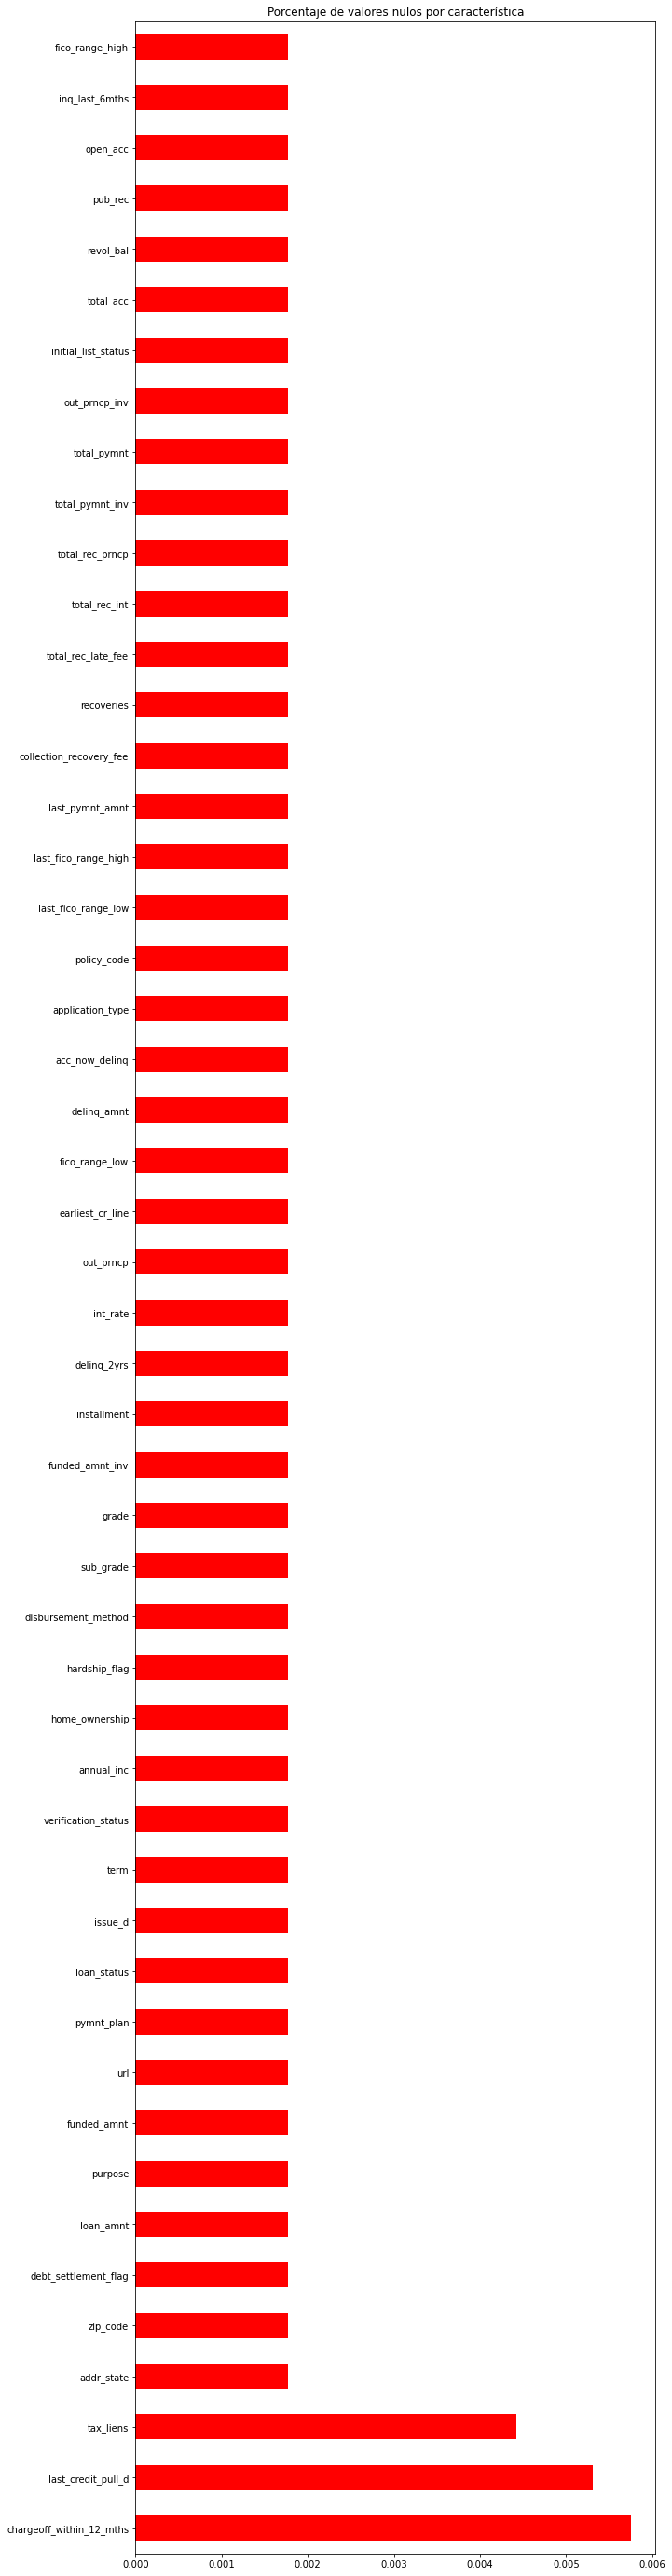

In [60]:
plt.figure(figsize=(10,50))
((data.isnull().sum())/len(data)*100).sort_values(ascending=False)[100:150].plot.barh(title='Porcentaje de valores nulos por característica', color='red')

In [45]:
a = ((data.isnull().sum())/len(data)*100).sort_values()

In [61]:
data2 = data.drop(data.loc[:, data.isna().mean().sort_values() > 0.3].columns, axis=1)

In [64]:
(data2.columns)

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_pa

In [71]:
len(data.loc[:, data.isna().mean().sort_values() > 0.3].columns)

94

In [66]:
data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=152)

In [72]:
data2.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0,39651438,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,...,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N
1,1,16411620,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,...,50.0,1.0,0.0,11600.0,4509.0,2400.0,0.0,N,Cash,N
2,2,45122316,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,...,0.0,0.0,0.0,222616.0,64253.0,5600.0,76154.0,N,Cash,N
3,3,125356772,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,...,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N
4,4,128490686,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,...,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N


In [78]:
data2.nunique() / len(data2) * 100

Unnamed: 0                    100.000000
id                            100.000000
loan_amnt                       0.666608
funded_amnt                     0.666608
funded_amnt_inv                 1.068696
term                            0.000885
int_rate                        0.267616
installment                    18.907860
grade                           0.003096
sub_grade                       0.015482
emp_title                      36.006989
emp_length                      0.004866
home_ownership                  0.002654
annual_inc                      7.483080
verification_status             0.001327
issue_d                         0.061043
loan_status                     0.003981
pymnt_plan                      0.000885
url                            99.998231
purpose                         0.006193
title                           3.860309
zip_code                        0.392799
addr_state                      0.022559
dti                             2.604503
delinq_2yrs     

In [80]:
data2.isna().sum() / len(data2) * 100

Unnamed: 0                     0.000000
id                             0.000000
loan_amnt                      0.001769
funded_amnt                    0.001769
funded_amnt_inv                0.001769
term                           0.001769
int_rate                       0.001769
installment                    0.001769
grade                          0.001769
sub_grade                      0.001769
emp_title                      7.361879
emp_length                     6.457734
home_ownership                 0.001769
annual_inc                     0.001769
verification_status            0.001769
issue_d                        0.001769
loan_status                    0.001769
pymnt_plan                     0.001769
url                            0.001769
purpose                        0.001769
title                          1.018269
zip_code                       0.001769
addr_state                     0.001769
dti                            0.077852
delinq_2yrs                    0.001769


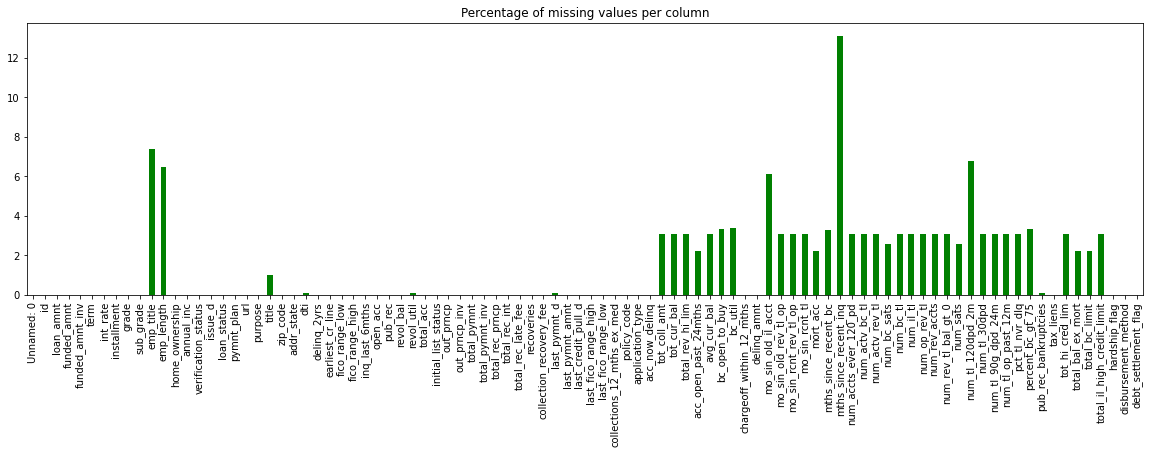

In [82]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

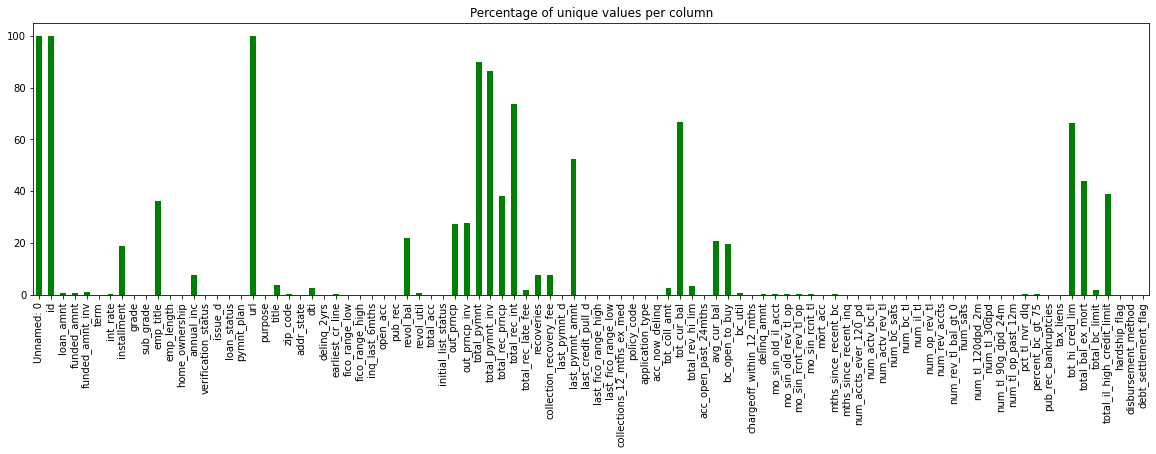

In [101]:
plt.figure(figsize=(20,5))
((data2.nunique() / len(data2)*100)).plot.bar(title='Percentage of unique values per column', color='green')

In [104]:
#Determinamos aquellas variables que tengan un porcentaje de registros únicos por cada variable mayor al valor de 0.7
threshold = 0.66

unique_percentages = data2.nunique() / len(data2)

# en caso se una variable numérica continua, es probable que todos los valores sean únicos (?)

criteria = unique_percentages > threshold

columns_to_filter = unique_percentages[criteria].keys()

In [105]:
len(columns_to_filter)

8

In [106]:
columns_to_filter

Index(['Unnamed: 0', 'id', 'url', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'tot_cur_bal', 'tot_hi_cred_lim'],
      dtype='object')

In [107]:
#Eliminamos las variables seleccionadas en el paso anterior
data2.drop(columns_to_filter, axis=1, inplace=True)

In [114]:
len(data2.columns)

86

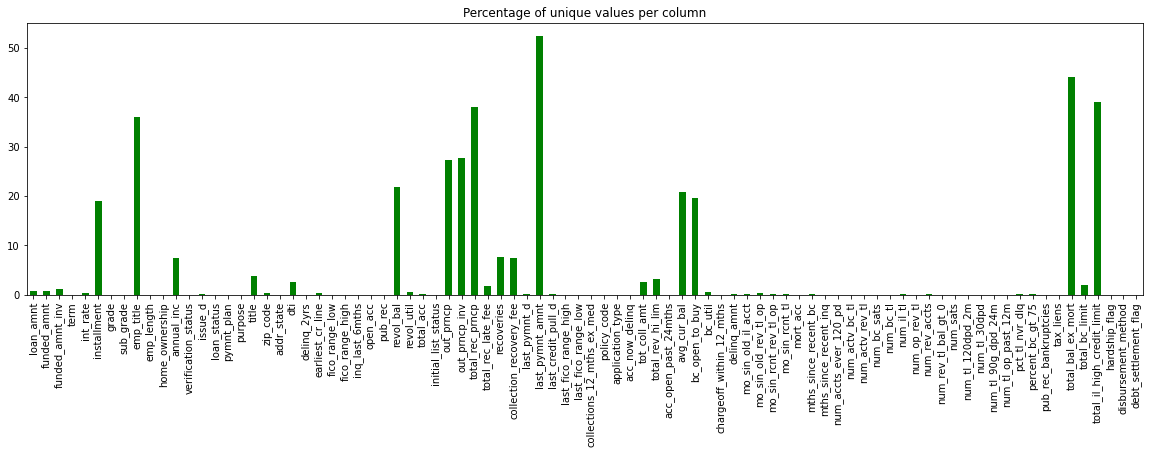

In [108]:
plt.figure(figsize=(20,5))
((data2.nunique() / len(data2)*100)).plot.bar(title='Percentage of unique values per column', color='green')

In [110]:
#Determinamos que variables son del tipo númerico y cuales son categóricas
numeric_columns = list()
categorical_columns = list()
dictionary_of_columns_with_index_to_categorical = dict()
dictionary_of_columns_with_categorical_to_index = dict()

for column in data2:
#Determinamos si la variable es numérica o no
    if pd.api.types.is_numeric_dtype(data2[column]):
        numeric_columns.append(column)
    else:
        #Modificamos el tipo de dato de la variable mediante "astype"
        data2[column] = data2[column].astype("category")

        #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
        if not pd.api.types.is_categorical_dtype(data2[column]):
            raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

        dictionary_of_columns_with_index_to_categorical[column] = dict()
        dictionary_of_columns_with_categorical_to_index[column] = dict()

        #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
        for index, category in enumerate(data2[column].cat.categories):
            dictionary_of_columns_with_index_to_categorical[column][index] = category
            dictionary_of_columns_with_categorical_to_index[column][category] = index

        categorical_columns.append(column)

In [112]:
len(numeric_columns)

64

In [113]:
len(categorical_columns)

22

In [116]:
#Reemplazamos los nulos con la mediana sólo de aquellas variables numéricas
median_of_numeric_columns = data2[numeric_columns].median()

data2[numeric_columns] = data2[numeric_columns].fillna(median_of_numeric_columns)

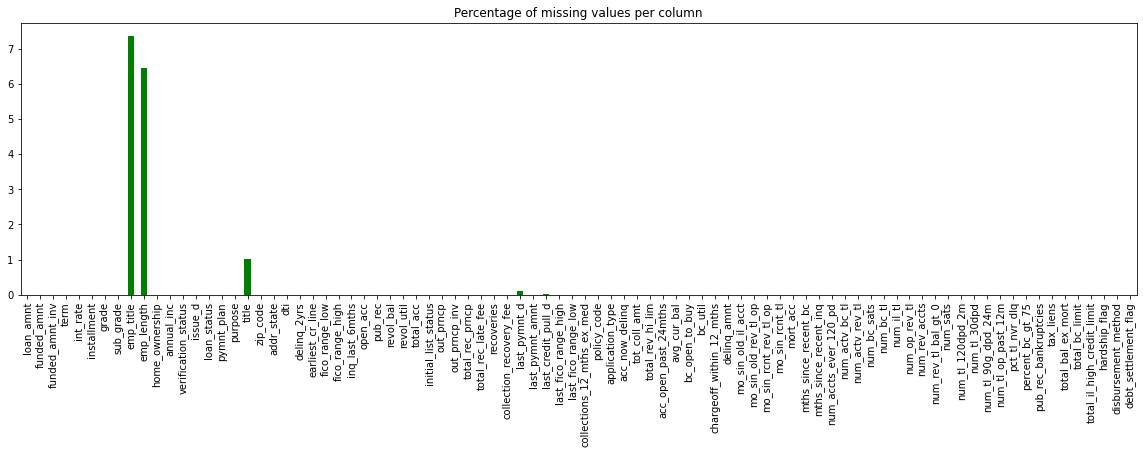

In [118]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [120]:
(data2.isnull().sum())/len(data2)*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.001769
int_rate                      0.000000
installment                   0.000000
grade                         0.001769
sub_grade                     0.001769
emp_title                     7.361879
emp_length                    6.457734
home_ownership                0.001769
annual_inc                    0.000000
verification_status           0.001769
issue_d                       0.001769
loan_status                   0.001769
pymnt_plan                    0.001769
purpose                       0.001769
title                         1.018269
zip_code                      0.001769
addr_state                    0.001769
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.001769
fico_range_low                0.000000
fico_range_high               0.000000
inq_last_6mths           

In [121]:
data2[['title', 'purpose']].head(10)

,title,purpose
0,Debt consolidation,debt_consolidation
1,Debt consolidation,debt_consolidation
2,Major purchase,major_purchase
3,Debt consolidation,debt_consolidation
4,Debt consolidation,debt_consolidation
5,Debt consolidation,debt_consolidation
6,Debt consolidation,debt_consolidation
7,Credit card refinancing,credit_card
8,Home buying,house
9,Debt consolidation,debt_consolidation


In [122]:
data2 = data2.drop('title', axis=1)

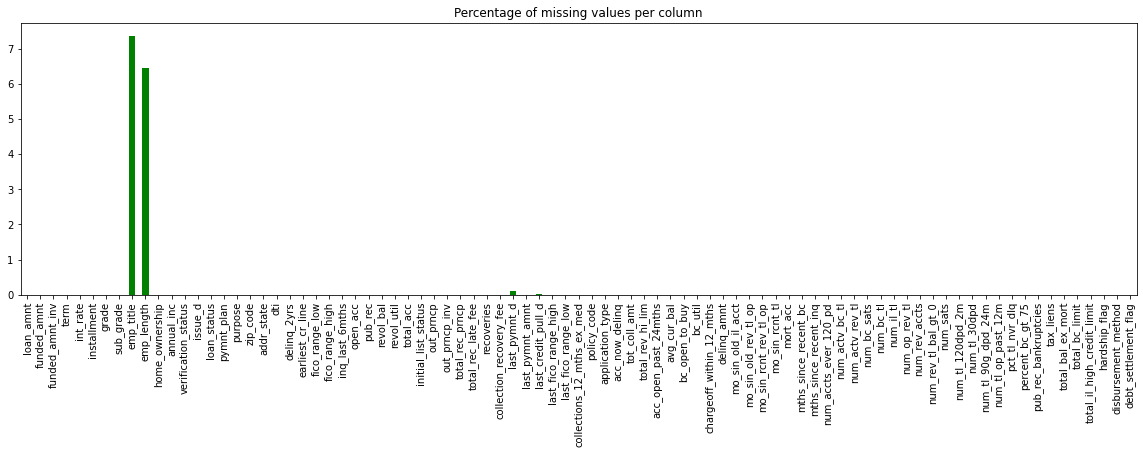

In [123]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [125]:
print(data2['emp_title'].nunique())
data2['emp_title'].value_counts()

81401


Teacher                                3942
Manager                                3417
Owner                                  2095
Registered Nurse                       1543
Driver                                 1487
                                       ... 
Refrigeration Project Manager             1
Refrigeration Foreman                     1
Refrigeration Coordinator                 1
Refrigerant Tech Supervisor               1
 \tOFFICE MANAGER/MEDICAL ASSISTANT       1
Name: emp_title, Length: 81401, dtype: int64

In [126]:
data2 = data2.drop('emp_title',axis=1)

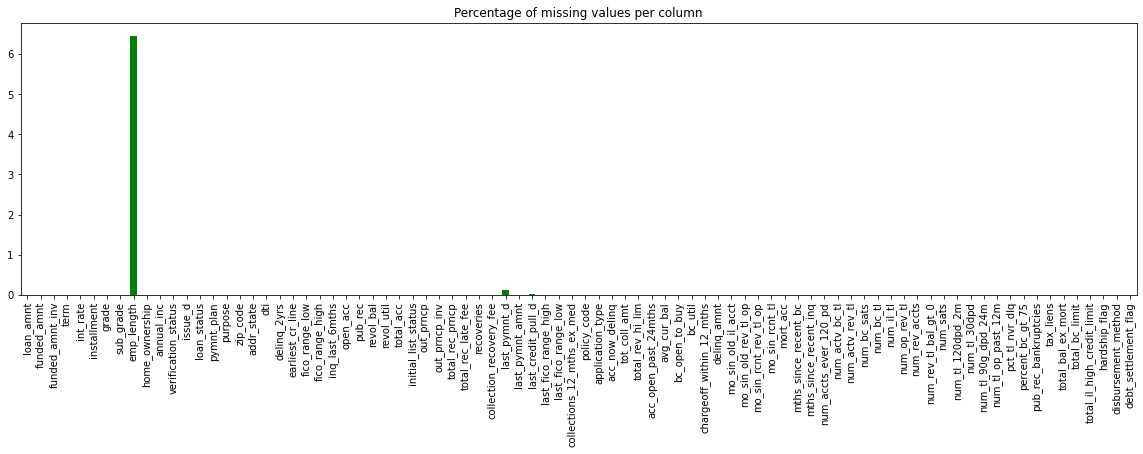

In [127]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [128]:
data2 = data2.drop('emp_length', axis=1)

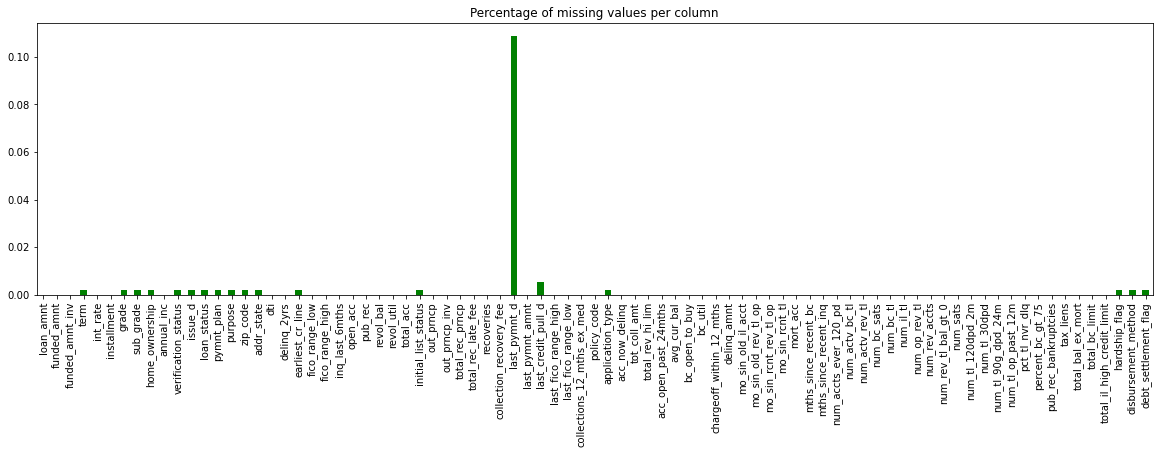

In [129]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [130]:
data2 = data2.dropna()

In [131]:
data2.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_re

In [132]:
len(data)

226070

In [133]:
len(data2)

225816

In [134]:
data2 = data2.drop('grade', axis=1)